In [42]:
import pandas as pd
import re
import string
import numpy as np
from sklearn.feature_extraction.stop_words import ENGLISH_STOP_WORDS
import nltk
from sklearn.pipeline import Pipeline

from nltk.corpus import stopwords
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import StratifiedShuffleSplit,StratifiedKFold
import warnings; warnings.simplefilter('ignore')
import matplotlib.pyplot as plt  
import seaborn as sns
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import learning_curve, validation_curve
from plotting import plot_learning_curve, plot_validation_curve
%matplotlib inline

In [2]:
data = pd.read_csv("spam.csv",encoding = "'latin'")

In [3]:
data # start analysing the data

,v1,v2,Unnamed: 2,Unnamed: 3,Unnamed: 4
0,ham,"Go until jurong point, crazy.. Available only ...",NaN,NaN,NaN
1,ham,Ok lar... Joking wif u oni...,NaN,NaN,NaN
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,NaN,NaN,NaN
3,ham,U dun say so early hor... U c already then say...,NaN,NaN,NaN
4,ham,"Nah I don't think he goes to usf, he lives aro...",NaN,NaN,NaN
...,...,...,...,...,...
5567,spam,This is the 2nd time we have tried 2 contact u...,NaN,NaN,NaN
5568,ham,Will Ì_ b going to esplanade fr home?,NaN,NaN,NaN
5569,ham,"Pity, * was in mood for that. So...any other s...",NaN,NaN,NaN
5570,ham,The guy did some bitching but I acted like i'd...,NaN,NaN,NaN


In [4]:
data1=data.drop('Unnamed: 2',axis=1)

In [5]:
data=data1.drop('Unnamed: 3',axis=1)

In [6]:
data=data.drop('Unnamed: 4',axis=1)

In [7]:
data

,v1,v2
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."
...,...,...
5567,spam,This is the 2nd time we have tried 2 contact u...
5568,ham,Will Ì_ b going to esplanade fr home?
5569,ham,"Pity, * was in mood for that. So...any other s..."
5570,ham,The guy did some bitching but I acted like i'd...


In [8]:
data.shape # to find number of rows and column

(5572, 2)

In [9]:
data.drop_duplicates(inplace=True)
data.shape #finding the existing number of rows and columns after dropping the duplicates

(5169, 2)

In [10]:
print(data.isnull().sum()) #checking for null values

v1    0
v2    0
dtype: int64


In [11]:
data1 = data.rename(columns = {'v1': 'spam', 'v2': 'text'}, inplace = False) #renaming the columns and storing it in another dataframe

In [12]:
data.head()

,v1,v2
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."


In [13]:
data1

,spam,text
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."
...,...,...
5567,spam,This is the 2nd time we have tried 2 contact u...
5568,ham,Will Ì_ b going to esplanade fr home?
5569,ham,"Pity, * was in mood for that. So...any other s..."
5570,ham,The guy did some bitching but I acted like i'd...


In [14]:
data1['result']=data1['spam'].apply(lambda x: 1 if x=='spam' else 0) #we create a new column which denotes the result in numerical form

In [15]:
data1

,spam,text,result
0,ham,"Go until jurong point, crazy.. Available only ...",0
1,ham,Ok lar... Joking wif u oni...,0
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,1
3,ham,U dun say so early hor... U c already then say...,0
4,ham,"Nah I don't think he goes to usf, he lives aro...",0
...,...,...,...
5567,spam,This is the 2nd time we have tried 2 contact u...,1
5568,ham,Will Ì_ b going to esplanade fr home?,0
5569,ham,"Pity, * was in mood for that. So...any other s...",0
5570,ham,The guy did some bitching but I acted like i'd...,0


In [16]:
def removethehyperlink(word):
    return  re.sub(r"http\S+", "", word)

def to_lower(word):
    result = word.lower()
    return result

def removethenumber(word):
    result = re.sub(r'\d+', '', word)
    return result

def removethepunctuation(word):
    result = word.translate(str.maketrans(dict.fromkeys(string.punctuation)))
    return result

def removethewhitespace(word):
    result = word.strip()
    return result

def replacethenewline(word):
    return word.replace('\n','')




def cleanuppipeline(sentence):
    
    cleaning_utils = [removethehyperlink,
                      replacethenewline,
                      to_lower,
                      removethenumber,
                      removethepunctuation,removethewhitespace
                      
                     ]
    for o in cleaning_utils:
        sentence = o(sentence)
    return sentence

data1.text = [cleanuppipeline(o) for o in data1.text] #data preprocessing

In [17]:
data1

,spam,text,result
0,ham,go until jurong point crazy available only in ...,0
1,ham,ok lar joking wif u oni,0
2,spam,free entry in a wkly comp to win fa cup final...,1
3,ham,u dun say so early hor u c already then say,0
4,ham,nah i dont think he goes to usf he lives aroun...,0
...,...,...,...
5567,spam,this is the nd time we have tried contact u u...,1
5568,ham,will ì b going to esplanade fr home,0
5569,ham,pity was in mood for that soany other suggest...,0
5570,ham,the guy did some bitching but i acted like id ...,0


In [18]:
from sklearn.model_selection import train_test_split
xtrain, xtest, ytrain, ytest = train_test_split(data1['text'], data1['result'], test_size=0.20, random_state=0)

In [19]:
from sklearn.feature_extraction.text import CountVectorizer # for feature extraction
cv = CountVectorizer()
xtrainvec = cv.fit_transform(xtrain.values)
xtrainvec.toarray()[:2]

array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]], dtype=int64)

In [20]:
cv.get_feature_names()# to get an overview about the feature names

['aa',
 'aah',
 'aaniye',
 'aaooooright',
 'aathilove',
 'aathiwhere',
 'ab',
 'abbey',
 'abeg',
 'abel',
 'aberdeen',
 'abi',
 'ability',
 'abiola',
 'abj',
 'able',
 'abnormally',
 'about',
 'aboutas',
 'absolutely',
 'abstract',
 'abt',
 'abta',
 'aburo',
 'abuse',
 'abusers',
 'ac',
 'academic',
 'acc',
 'accent',
 'accept',
 'access',
 'accessible',
 'accidant',
 'accident',
 'accidentally',
 'accommodation',
 'accomodations',
 'accordin',
 'accordingly',
 'accordinglyor',
 'account',
 'accounting',
 'accounts',
 'accumulation',
 'achanammarakheshqatar',
 'ache',
 'achieve',
 'acid',
 'aclpm',
 'acnt',
 'acoentry',
 'across',
 'acsmsrewards',
 'act',
 'acted',
 'acting',
 'action',
 'activate',
 'active',
 'activities',
 'actor',
 'actual',
 'actually',
 'acwicmbcktzr',
 'ad',
 'adam',
 'add',
 'addamsfa',
 'added',
 'addicted',
 'addie',
 'adding',
 'address',
 'addressull',
 'adds',
 'adi',
 'adjustable',
 'admin',
 'administrator',
 'admirer',
 'admission',
 'admit',
 'admiti',

In [21]:
len(cv.get_feature_names())# to get number of features

7457

In [22]:
from sklearn.naive_bayes import MultinomialNB #our classifier
model1 = MultinomialNB()


In [23]:
ssk =StratifiedKFold(n_splits=10,random_state=20)

scores_sss  = cross_val_score(model1,xtrainvec, ytrain, scoring='precision', cv=ssk)# cross validating since the dataset is small

In [24]:
print(scores_sss)

[0.88461538 0.87037037 0.84313725 0.87037037 0.80327869 0.87037037
 0.8245614  0.84210526 0.82692308 0.84210526]


In [25]:
scores_sss.mean()

0.8477837445900684

<Figure size 720x432 with 0 Axes>

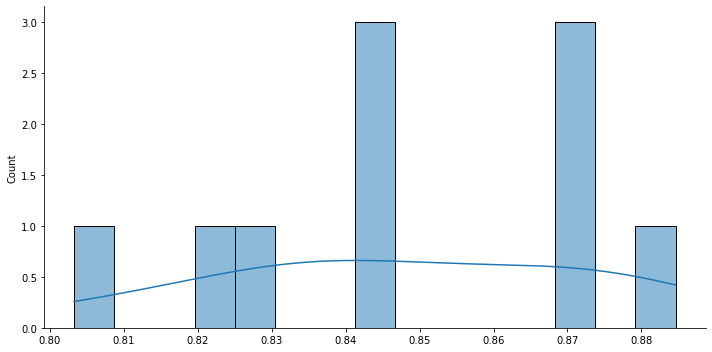

In [26]:
plt.figure(figsize=(10,6))
sns.displot(scores_sss, bins=15, kde=True, height=5, aspect=2);# to plot the class distribution

In [27]:
param_grid = {'alpha':[0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9,1.0],'fit_prior':['True','False']}
grid = GridSearchCV(estimator=model1, param_grid=param_grid, n_jobs=1, cv=ssk,scoring='precision')
grid_result = grid.fit(xtrainvec,ytrain)

In [28]:
print(grid_result.best_params_)

{'alpha': 0, 'fit_prior': 'True'}


In [29]:
model=grid_result.best_estimator_

(<Figure size 720x360 with 1 Axes>,
 <AxesSubplot:title={'center':'Learning Curve'}, xlabel='Training examples', ylabel='Score'>)

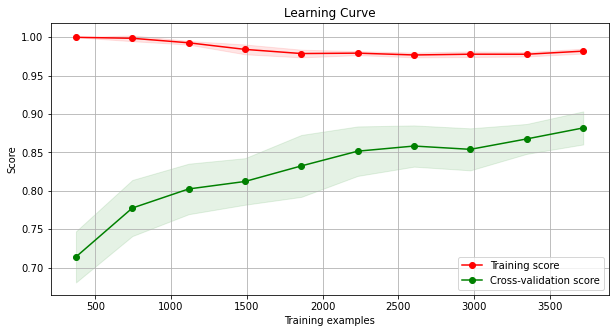

In [30]:
plot_learning_curve(model,xtrainvec,ytrain,cv=ssk,scoring='precision',train_sizes=np.linspace(.1,1.0,10))

(<Figure size 720x360 with 1 Axes>,
 <AxesSubplot:title={'center':"Validation Curve with <class 'sklearn.naive_bayes.MultinomialNB'>"}, xlabel='alpha', ylabel='precision'>)

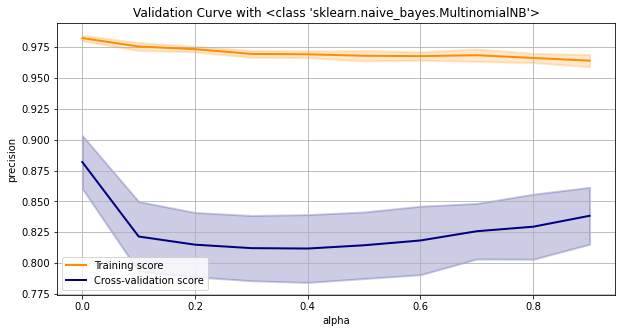

In [31]:
plot_validation_curve(model,xtrainvec,ytrain,cv=ssk,scoring='precision',param_name='alpha',param_range=np.arange(0,1,.1))

In [32]:
emails = [
    'Hey mohan, can we get together to watch footbal game tomorrow?',
    'Upto 20% discount on parking, exclusive offer just for you. Dont miss this reward!',
    'Congrats you have won 1000$.Please go to the following site to proceed'
]
emails_count = cv.transform(emails)
model.predict(emails_count)#just a demo test to understand whether it works or not,any demo mail can be included

array([0, 1, 1], dtype=int64)

In [33]:
X_test_count =cv.transform(xtest)


In [34]:
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
pred = model.predict(X_test_count)
print(classification_report(ytest, pred))
print()
print("Confusion Matrix: \n", confusion_matrix(ytest, pred))
print("Accuracy: \n", accuracy_score(ytest, pred))

              precision    recall  f1-score   support

           0       0.98      0.99      0.98       885
           1       0.96      0.86      0.90       149

    accuracy                           0.97      1034
   macro avg       0.97      0.93      0.94      1034
weighted avg       0.97      0.97      0.97      1034


Confusion Matrix: 
 [[879   6]
 [ 21 128]]
Accuracy: 
 0.9738878143133463


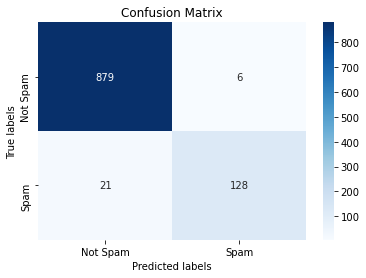

In [35]:

   

plot= plt.subplot()
sns.heatmap(confusion_matrix(ytest, pred), annot=True, ax = plot,cmap='Blues',fmt=''); #annot=True to annotate cells

# labels, title and ticks
plot.set_xlabel('Predicted labels');
plot.set_ylabel('True labels'); 
plot.set_title('Confusion Matrix'); 
plot.xaxis.set_ticklabels(['Not Spam', 'Spam']); plot.yaxis.set_ticklabels(['Not Spam', 'Spam']);

In [36]:
### These process could be done using pipelining also but since we need to show the validation results and several results I did it seperately
#I have done the model fitting ,predictions ,count vectorisations etc using pipeline and they have the same results

In [37]:
pipeline = Pipeline([
   ( 'bow',CountVectorizer()),
    ('classifier',MultinomialNB()),
])

pipeline.fit(xtrain.values,ytrain)

Pipeline(steps=[('bow', CountVectorizer()), ('classifier', MultinomialNB())])

In [38]:
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
pred = pipeline.predict(xtest)
print(classification_report(ytest, pred))
print()
print("Confusion Matrix: \n", confusion_matrix(ytest, pred))
print("Accuracy: \n", accuracy_score(ytest, pred))

              precision    recall  f1-score   support

           0       0.98      1.00      0.99       885
           1       0.98      0.88      0.93       149

    accuracy                           0.98      1034
   macro avg       0.98      0.94      0.96      1034
weighted avg       0.98      0.98      0.98      1034


Confusion Matrix: 
 [[882   3]
 [ 18 131]]
Accuracy: 
 0.9796905222437138


In [39]:
from sklearn.dummy import DummyClassifier
dum = DummyClassifier(strategy="stratified")
dum.fit(xtrainvec,ytrain)

DummyClassifier(strategy='stratified')

In [40]:
pred1 = dum.predict(X_test_count)
print(classification_report(ytest, pred1))
print()
print("Confusion Matrix: \n", confusion_matrix(ytest, pred1))
print("Accuracy: \n", accuracy_score(ytest, pred1))

              precision    recall  f1-score   support

           0       0.86      0.89      0.88       885
           1       0.15      0.11      0.13       149

    accuracy                           0.78      1034
   macro avg       0.51      0.50      0.50      1034
weighted avg       0.76      0.78      0.77      1034


Confusion Matrix: 
 [[792  93]
 [132  17]]
Accuracy: 
 0.7823984526112185


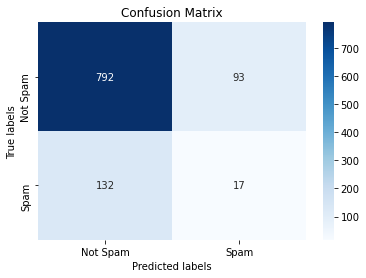

In [41]:
plot1= plt.subplot()
sns.heatmap(confusion_matrix(ytest, pred1), annot=True, ax = plot1,cmap='Blues',fmt=''); #annot=True to annotate cells

# labels, title and ticks
plot1.set_xlabel('Predicted labels');
plot1.set_ylabel('True labels'); 
plot1.set_title('Confusion Matrix'); 
plot1.xaxis.set_ticklabels(['Not Spam', 'Spam']); plot1.yaxis.set_ticklabels(['Not Spam', 'Spam']);